In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/mission_launches.csv")


#drop irrelevant columns
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")

#converting to binary ( success = 1, anything else = 0)
df["y"] = (df["Mission_Status"].astype(str).str.strip().str.lower() == "success").astype(int)

#converting date and time to just the launch year
df["LaunchYear"] = pd.to_datetime(df["Date"], errors="coerce").dt.year

#cleaning prices
df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

#setting features and making copies
X = df[["Organisation", "Location", "Rocket_Status", "Price", "LaunchYear"]].copy()
y = df["y"].copy()

#joining x and y together and dropping rows that are missing essential data
data = pd.concat([X, y.rename("y")], axis=1).dropna(subset=["LaunchYear", "Price", "y"])
X = data.drop(columns=["y"])
y = data["y"]


Accuracy: 0.9427083333333334
ROC-AUC: 0.6722527472527472

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.95      0.99      0.97       182

    accuracy                           0.94       192
   macro avg       0.47      0.50      0.49       192
weighted avg       0.90      0.94      0.92       192



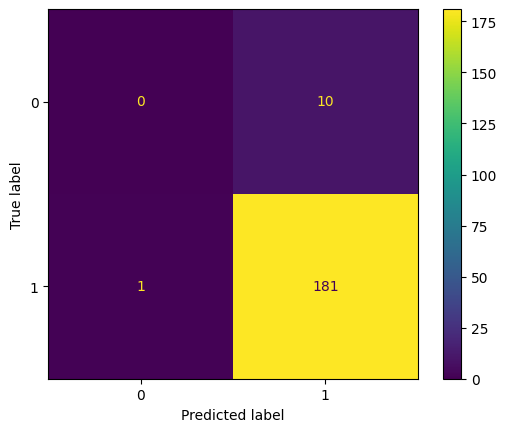

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

#one-hot encoding
X_encoded = pd.get_dummies(X, columns=["Organisation", "Location", "Rocket_Status"], drop_first=True)

#drop any remaining NaNs 
data2 = pd.concat([X_encoded, y.rename("y")], axis=1).dropna()
X_clean = data2.drop(columns=["y"])
y_clean = data2["y"]



#train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
    )

#fitting scaler on training data and transforming training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#creating a logistic regression model (best fit for this type of data)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train) #training the model

#prediction of class labels on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1] #predicted probabilities on the test set

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()






conclusion

Logistic regression gives a strong traditional baseline for prediction mission success.The model achieves reasonable accuracy which means it recognises
important patterns in the data. However, as it is a linear model it may struggle to represent more complex interactions between features such as
organisation, rocket status, and launch year. This is what gives neural network models an advantage.